## Kmeans Algorithm

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C:\\Users\\Krishna\\Desktop\\dataset\\country-data.csv")
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["country"]=le.fit_transform(df["country"])

In [8]:
x=df

In [11]:
from sklearn.cluster import KMeans
k=[1,2,3,4,5,6,7,8,9,10]
ssd=[]
for i in k:
    model=KMeans(n_clusters=i)
    model.fit(x)
    ssd.append(model.inertia_ )

Text(0, 0.5, 'Inertia(Sum of Squared Distances)')

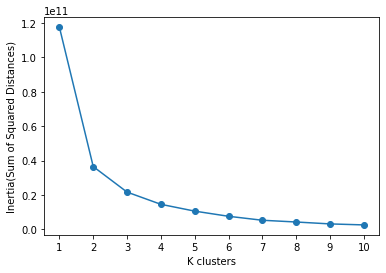

In [12]:
plt.plot(k,ssd,marker='o')
plt.xticks(k)
plt.xlabel("K clusters")
plt.ylabel("Inertia(Sum of Squared Distances)")

In [13]:
model=KMeans(n_clusters=5)
model.fit(x)

KMeans(n_clusters=5)

In [14]:
model.labels_

array([4, 4, 1, 4, 1, 1, 4, 0, 0, 1, 3, 3, 4, 1, 1, 0, 4, 4, 4, 4, 4, 1,
       1, 0, 1, 4, 4, 4, 4, 0, 4, 4, 4, 1, 4, 1, 4, 4, 4, 1, 4, 1, 3, 3,
       0, 1, 4, 4, 4, 3, 4, 1, 4, 0, 0, 1, 4, 4, 0, 4, 3, 1, 4, 4, 4, 4,
       4, 1, 0, 4, 4, 1, 1, 0, 3, 3, 4, 0, 4, 1, 4, 4, 0, 4, 4, 1, 1, 4,
       4, 3, 1, 2, 1, 4, 4, 1, 1, 4, 3, 4, 1, 4, 4, 4, 1, 4, 4, 4, 4, 4,
       0, 3, 4, 4, 2, 3, 4, 1, 4, 4, 4, 1, 3, 2, 1, 1, 4, 4, 3, 4, 1, 1,
       4, 0, 3, 3, 4, 1, 3, 3, 4, 1, 4, 1, 0, 0, 4, 4, 1, 4, 4, 4, 4, 1,
       4, 4, 4, 0, 0, 0, 1, 4, 4, 1, 4, 4, 4])

In [15]:
model.n_iter_

6

In [16]:
data=df
data["Country Group"]=model.labels_

In [17]:
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Country Group
0,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,4
1,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,4
2,2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,4
4,4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...,...
162,162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,4
163,163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1
164,164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,4
165,165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,4


## Perform hierarchical/agglomerative clustering.

In [19]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [24]:
df["country"]=le.fit_transform(df["country"])
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [25]:
x=df

In [26]:
import scipy.cluster.hierarchy as shc

### using ward method 

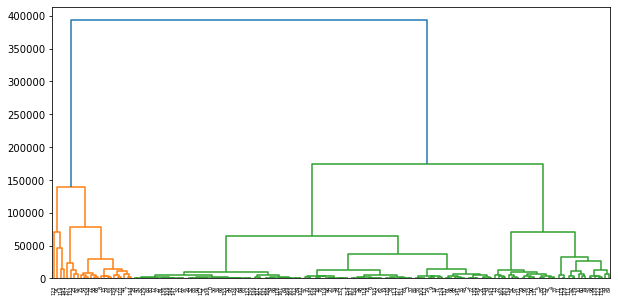

In [28]:
plt.figure(figsize=(10,5))
#from scipy.cluster import heirarchy 
den=shc.dendrogram(shc.linkage(x,method="ward"))

In [29]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=4)
model.fit(x)

AgglomerativeClustering(n_clusters=4)

In [30]:
model.labels_

array([2, 2, 2, 2, 3, 3, 2, 0, 0, 2, 3, 3, 2, 3, 2, 0, 2, 2, 2, 2, 2, 2,
       3, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,
       0, 2, 2, 2, 2, 3, 2, 3, 2, 0, 0, 2, 2, 2, 0, 2, 3, 2, 2, 2, 2, 2,
       2, 3, 0, 2, 2, 2, 2, 0, 3, 0, 2, 0, 2, 3, 2, 2, 0, 2, 2, 3, 2, 2,
       2, 3, 3, 1, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 3, 2, 2, 1, 3, 2, 2, 2, 2, 2, 3, 3, 1, 2, 3, 2, 2, 3, 2, 2, 3,
       2, 0, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 3,
       2, 2, 2, 0, 0, 0, 3, 2, 2, 3, 2, 2, 2], dtype=int64)

In [42]:
data=df
data["Country Group"]=model.labels_
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Country Group
0,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3
...,...,...,...,...,...,...,...,...,...,...,...
162,162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2
163,163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,3
164,164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2
165,165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,2


### using single method 

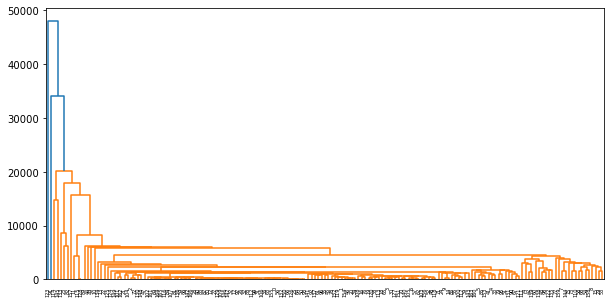

In [31]:
plt.figure(figsize=(10,5))
#from scipy.cluster import heirarchy 
den=shc.dendrogram(shc.linkage(x,method="single"))

In [46]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=6)
model.fit(x)

AgglomerativeClustering(n_clusters=6)

In [47]:
model.labels_

array([2, 2, 2, 2, 0, 0, 2, 3, 3, 2, 0, 0, 2, 0, 2, 3, 2, 2, 2, 2, 2, 2,
       0, 4, 2, 2, 2, 2, 2, 3, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       3, 2, 2, 2, 2, 0, 2, 0, 2, 3, 3, 2, 2, 2, 3, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 3, 2, 2, 2, 2, 3, 0, 3, 2, 3, 2, 0, 2, 2, 4, 2, 2, 0, 2, 2,
       2, 0, 0, 1, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 0, 2, 2, 1, 0, 2, 2, 2, 2, 2, 0, 0, 5, 2, 0, 2, 2, 0, 2, 2, 0,
       2, 4, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 3, 1, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 4, 3, 3, 0, 2, 2, 0, 2, 2, 2], dtype=int64)

In [48]:
data=df
data["Country Group"]=model.labels_
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Country Group
0,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2
163,163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2
165,165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,2


### using average method 

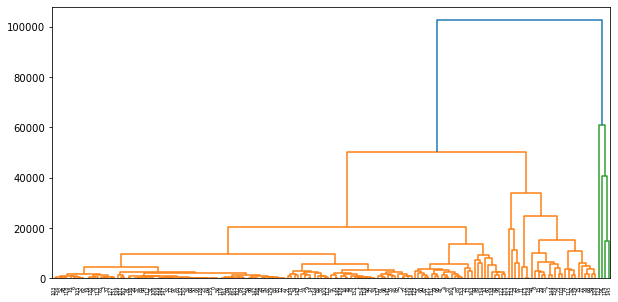

In [33]:
plt.figure(figsize=(10,5))
#from scipy.cluster import heirarchy 
den=shc.dendrogram(shc.linkage(x,method="average"))

In [49]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=7)
model.fit(x)

AgglomerativeClustering(n_clusters=7)

In [50]:
model.labels_

array([0, 0, 0, 0, 6, 6, 0, 3, 3, 0, 2, 2, 0, 6, 0, 3, 0, 0, 0, 0, 0, 0,
       6, 4, 0, 0, 0, 0, 0, 3, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 6, 2, 2,
       3, 0, 0, 0, 0, 2, 0, 6, 0, 3, 3, 0, 0, 0, 3, 0, 2, 0, 0, 0, 0, 0,
       0, 6, 3, 0, 0, 0, 0, 3, 2, 3, 0, 3, 0, 6, 0, 0, 4, 0, 0, 6, 0, 0,
       0, 2, 6, 1, 0, 0, 0, 6, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 6, 2, 5, 0, 6, 0, 0, 2, 0, 0, 6,
       0, 4, 6, 2, 0, 0, 2, 2, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 6,
       0, 0, 0, 4, 3, 3, 6, 0, 0, 6, 0, 0, 0], dtype=int64)

In [51]:
data=df
data["Country Group"]=model.labels_
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Country Group
0,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,6
...,...,...,...,...,...,...,...,...,...,...,...
162,162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,6
164,164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


### using complete method 

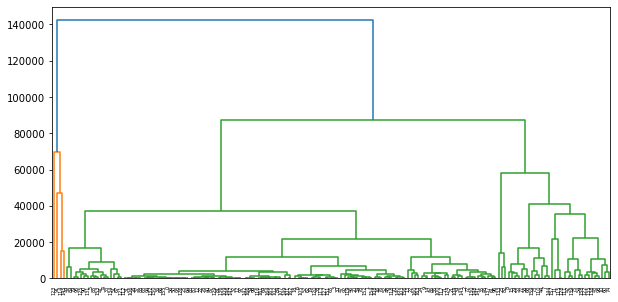

In [34]:
plt.figure(figsize=(10,5))
#from scipy.cluster import heirarchy 
den=shc.dendrogram(shc.linkage(x,method="complete"))

In [52]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=6)
model.fit(x)

AgglomerativeClustering(n_clusters=6)

In [53]:
model.labels_

array([2, 2, 2, 2, 0, 0, 2, 3, 3, 2, 0, 0, 2, 0, 2, 3, 2, 2, 2, 2, 2, 2,
       0, 4, 2, 2, 2, 2, 2, 3, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       3, 2, 2, 2, 2, 0, 2, 0, 2, 3, 3, 2, 2, 2, 3, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 3, 2, 2, 2, 2, 3, 0, 3, 2, 3, 2, 0, 2, 2, 4, 2, 2, 0, 2, 2,
       2, 0, 0, 1, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 0, 2, 2, 1, 0, 2, 2, 2, 2, 2, 0, 0, 5, 2, 0, 2, 2, 0, 2, 2, 0,
       2, 4, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 3, 1, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 4, 3, 3, 0, 2, 2, 0, 2, 2, 2], dtype=int64)

In [54]:
data=df
data["Country Group"]=model.labels_
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Country Group
0,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2
163,163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2
165,165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,2
